# AIDI 2003 Capstone II (The Invicibles )

##### object detection in images for self-driving car game by using YOLO.

In [24]:
import numpy as np
import pandas as pd


from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [25]:
df = pd.read_csv('dataset/labels_train.csv')
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
112361,1479504558885720551.jpg,230,237,141,148,1
9931,1478020963221292068.jpg,205,225,134,155,1
65383,1479498775990936054.jpg,329,353,140,156,1
5004,1478020454697408037.jpg,60,109,141,160,1
114115,1479504689891818101.jpg,333,342,135,165,3


In [26]:
classes = df.class_id.unique()
print(classes)

[1 3 5 2 4]


In [27]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

In [19]:
!pip install Pillow

In [28]:
from PIL import Image

# Get path images and boxes (x,y) for each class_id
boxes = {}
images = {}

base_path = 'dataset/images/'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]
    
    images[class_id] = Image.open(base_path + first_row['frame']).convert("RGB")
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

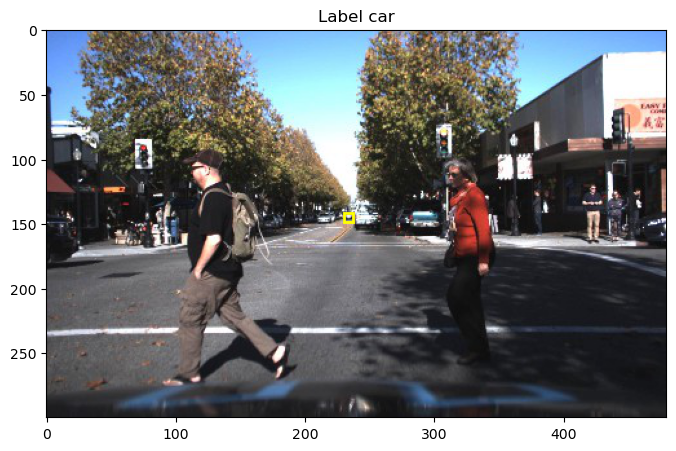

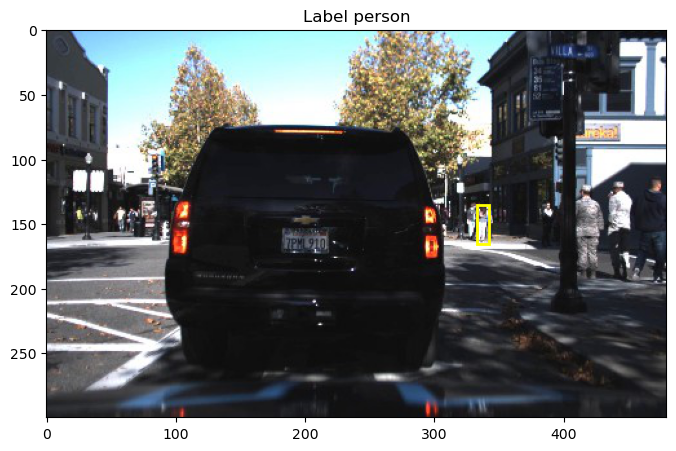

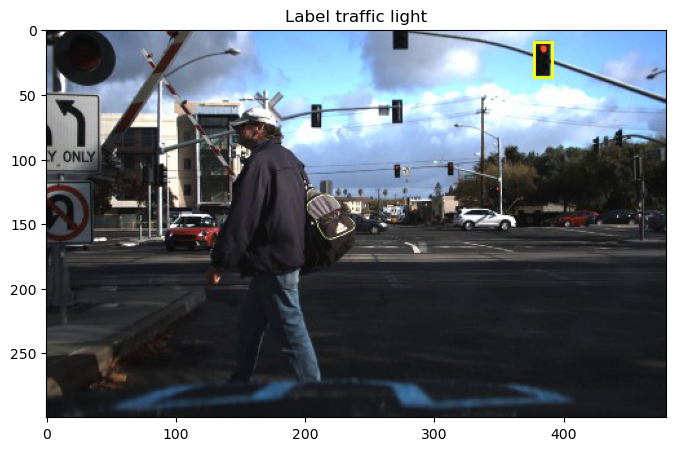

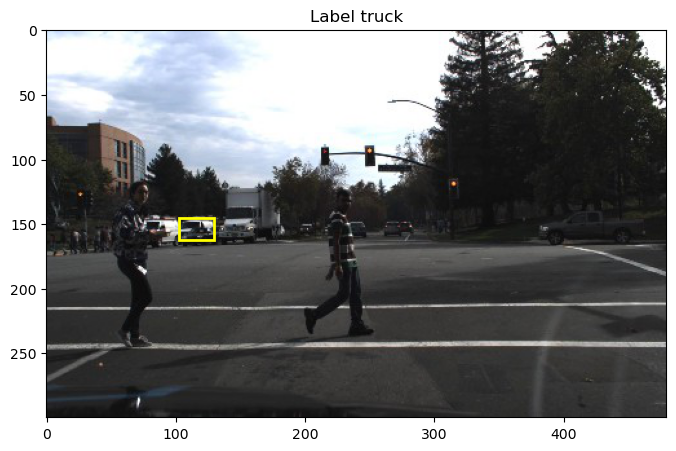

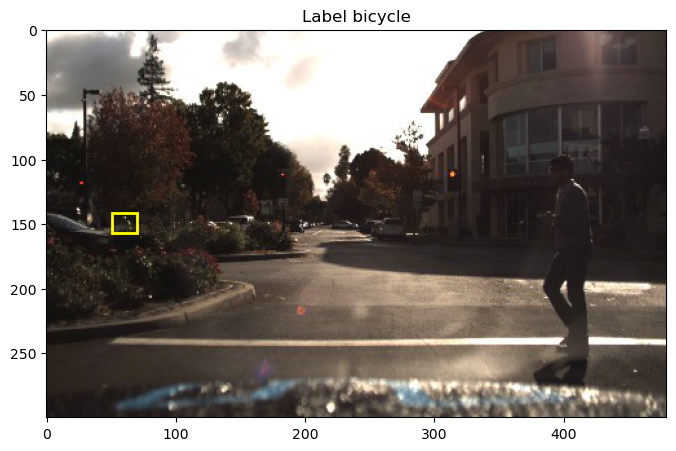

In [29]:
for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[i])
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))
    
    plt.show()

In [2]:
!pip install ultralytics

In [4]:
from ultralytics import YOLO
import PIL 
from PIL import Image
from IPython.display import display
import os 
import pathlib 

In [5]:

model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:12<00:00, 4.17MB/s]


In [7]:
results=model.predict(source="dataset/images/1478019956680248165.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 C:\Users\PC\Downloads\self-driving-object-detection\dataset\images\1478019956680248165.jpg: 416x640 1 car, 1 truck, 2617.0ms
Speed: 16.4ms preprocess, 2617.0ms inference, 15.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to C:\Users\PC\runs\detect\predict


In [8]:
result = results[0]
box = result.boxes[0]

In [9]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [10]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.69143676757812, 142.68826293945312, 148.7809295654297, 162.10047912597656]
Probability: 0.7161704897880554


In [11]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [125, 143, 149, 162]
Probability: 0.72
---
Object type: truck
Coordinates: [141, 139, 157, 154]
Probability: 0.31
---


In [12]:
results1 = model.predict(source="dataset/images/1478020211690815798.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 C:\Users\PC\Downloads\self-driving-object-detection\dataset\images\1478020211690815798.jpg: 416x640 4 cars, 3 traffic lights, 2197.9ms
Speed: 8.0ms preprocess, 2197.9ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to C:\Users\PC\runs\detect\predict


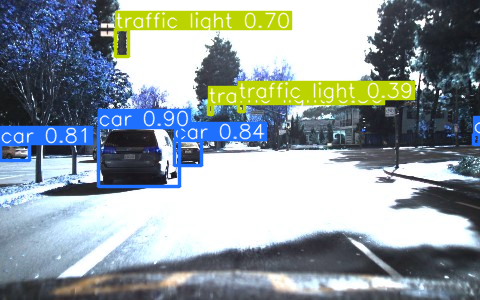

In [16]:
import numpy as np
# Plotting results
plot = results1[0].plot()
pil_image = Image.fromarray(plot)  # Convert numpy array to PIL Image
pil_rgb_image = pil_image.convert('RGB')  # Convert the color space to RGB
rgb_plot = np.array(pil_rgb_image)
display(Image.fromarray(plot))